## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
merge_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
unique_mice = merge_df["Mouse ID"].nunique()
unique_mice

249

In [ ]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# (group by mouse ID and Timepoint, find count. 

# Groupby attempt:
#mice_gb = merge_df.groupby(["Mouse ID","Timepoint"]).count
#print(mice_gb)

##turn the groupby into a dataframe
#mice_df = pd.DataFrame(mice_gb)
#Doesn't work:
#mice_df.sort_values("Sex", ascending = False)

#duplicate = sort_values("Sex", ascending = False).head()

#print dataframe
#totalmice_df


In [5]:
# #SECOND ATTEMPT
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# (group by mouse ID and Timepoint, find count. 
duplicate_mice = merge_df.groupby(["Mouse ID", "Timepoint"]).count()
duplicate_mice.sort_values("Sex", ascending = False)

Drug Regimen  Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
g989     20                    2    2           2           2   
         15                    2    2           2           2   
         10                    2    2           2           2   
         5                     2    2           2           2   
         0                     2    2           2           2   
...                          ...  ...         ...         ...   
i334     20                    1    1           1           1   
         15                    1    1           1           1   
         10                    1    1           1           1   
         5                     1    1           1           1   
z969     45                    1    1           1           1   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
g989     20                          2                 2  
         15                          2                 2  
         10                          2                 2  
         5                           2                 2  
         0                           2                 2  
...                                ...               ...  
i334     20                          1                 1  
         15                          1                 1  
         10                          1                 1  
         5                           1                 1  
z969     45                          1                 1  

[1888 rows x 6 columns]

In [ ]:
#anything with a count of more than 1 is a duplicate


In [8]:
# Optional: Get all the data for the duplicate mouse ID. 

merge_df.loc[merge_df["Mouse ID"] == "g989",:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_clean = merge_df.loc[merge_df["Mouse ID"] != "g989", :]
combined_clean.head()


##from notes:
## Remove the rows with missing data
#clean_ufo_df = ufo_df.dropna(how="any")
#clean_ufo_df.count()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
# Checking the number of mice in the clean DataFrame.
total_mice = combined_clean["Mouse ID"].nunique()
total_mice

248

## Summary Statistics

In [20]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

#summary_drug = combined_clean.groupby("Drug Regimen")
#mean_tumor = summary_drug["Tumor Volume (mm3)"].mean()
#m


summary_drug = combined_clean.groupby("Drug Regimen")
mean_tumor = summary_drug["Tumor Volume (mm3)"].mean()
median_tumor = summary_drug["Tumor Volume (mm3)"].median()
var_tumor = summary_drug["Tumor Volume (mm3)"].var()
std_tumor = summary_drug["Tumor Volume (mm3)"].std()
sem_tumor = summary_drug["Tumor Volume (mm3)"].sem()

drugreg_summary = pd.DataFrame(
    {"Mean tumor Size" : mean_tumor,
     "Median Tumor Size": median_tumor,
     "Tumor Variance": var_tumor,
     "Tumor Standard Dev" : std_tumor,
     "Tumor SEM": sem_tumor
    }
)
drugreg_summary


,Mean tumor Size,Median Tumor Size,Tumor Variance,Tumor Standard Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [27]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

drugreg2_df = combined_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])
drugreg2_df


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

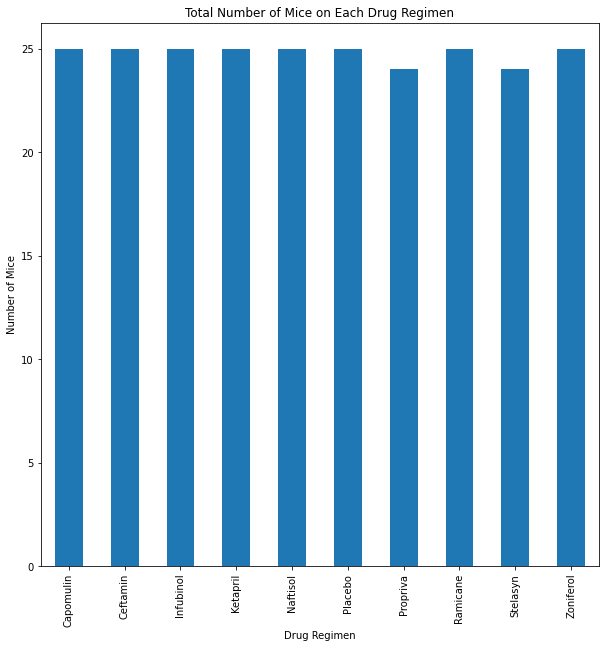

In [60]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

# Pandas can also plot multiple columns if the DataFrame includes them
#drug_plot = combined_clean.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
#drug_plot.set_xticklabels(rain_df["State"], rotation=45)

#plt.show()
#plt.tight_layout()

MouseID = combined_clean.groupby("Drug Regimen")["Mouse ID"].nunique()
MouseID.plot(kind = 'bar', figsize=(10,10))
plt.title("Total Number of Mice on Each Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

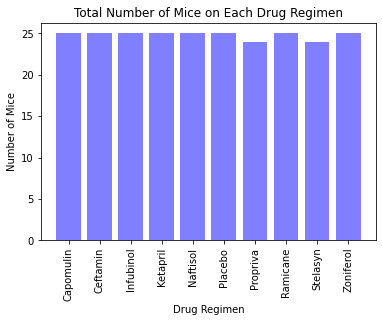

In [52]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

#set x_axis to groupby in previous step
x_axis = range(combined_clean["Drug Regimen"].nunique())

#set y axis to our unique MouseID
y_axis = MouseID

plt.bar(x_axis, y_axis, color='b', alpha=0.5, align="center")

#find index names, return sorted to match sorted data
drugs = sorted(combined_clean["Drug Regimen"].unique())

plt.xticks(x_axis, drugs, rotation= 90) 

plt.title("Total Number of Mice on Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show

In [75]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

MouseSex = combined_clean.groupby("Sex")["Mouse ID"].nunique()

#check distribution
print(MouseSex)

Sex
Female    123
Male      125
Name: Mouse ID, dtype: int64


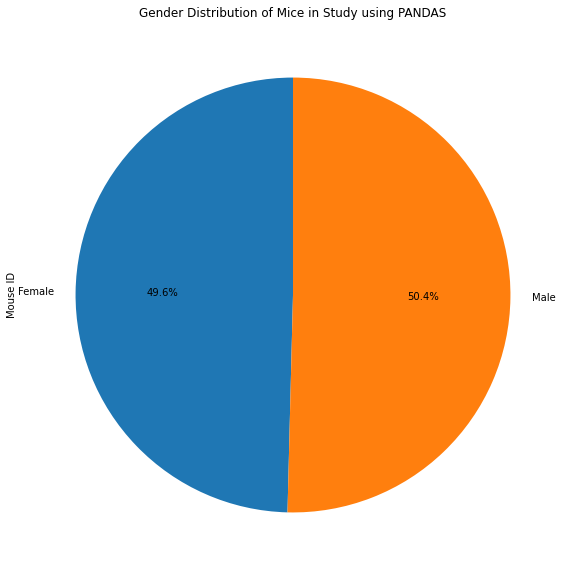

In [83]:
MouseSex.plot(kind = 'pie', y='Sex', figsize=(10,10), startangle=90, autopct='%1.1f%%')
plt.title("Gender Distribution of Mice in Study using PANDAS")
plt.show()

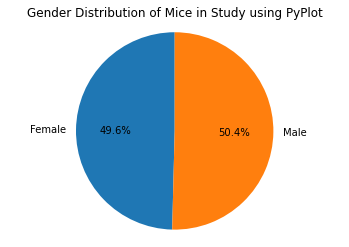

In [86]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
sexes = ["Female", "Male"]
sizes = MouseSex
explode = (0, 0) 

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=sexes, autopct='%1.1f%%',
        shadow=False, startangle=90)

 # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axis('equal') 

plt.title("Gender Distribution of Mice in Study using PyPlot")
plt.show()


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [ ]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
